## [상황]
주식회사 한경AI에 수석 머신러닝 엔지니어로 취직한 당신. 

첫번째 프로젝트로 휴대폰으로 식물의 사진을 찍으면 식물의 이름을 알려주는 앱을 개발하였다. 
하지만 고객센터에 다음과 같은 문의가 빗발쳤다.

이용자A : "붓꽃은 종류가 다양한데 이 앱은 붓꽃의 세부 종류는 구별하지 못하네요. 개선해주세요. 아니면 다른 앱으로 갈아타겠습니다."

이 위기를 해결하기 위하여 먼저 테이블 데이터를 사용하여 붓꽃의 세부 종류를 구별하는 프로그램을 개발해보자.

# 데이터 수집
다음은 현장 직원이 붓꽃의 데이터를 모아서 정리한 자료이다. 전처리를 시행해 보자.

In [14]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
print(df[4].describe())
print('')
print('주어진 데이터 셋에서 붓꽃의 종류는 ', df[4].unique(),'입니다.')

count             150
unique              3
top       Iris-setosa
freq               50
Name: 4, dtype: object

주어진 데이터 셋에서 붓꽃의 종류는  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 입니다.


# 문제 1. 
위에서 정의한 데이터프레임 df를 사용하여 특성(X)와 정답(y)를 구성하자.

## 조건
1. 데이터 셋에서 2가지 종류의 붓꽃만 사용한다. 
- 데이터프레임 df에서 0~99행의 자료를 사용한다. 
- (힌트 df.iloc[   ].values)
- (0~99행의 자료를 사용하면 'Iris-setosa', 'Iris-versicolor' 두 종류만 선택된다.)

2. 정답 벡터 y의 클래스  
- y가 'Iris-setosa'면 음성 클래스 -1, 'Iris-versicolor'이면 양성 클래스 1을 사용한다.
- (힌트 np.where(    ))

3. 특성 행렬 X 설정
- 모든 특성 (4개)를 사용하여 특성 행렬 X를 구성한다.
- (힌트 df.iloc[   ].values)


In [16]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 너비, 꽃잎 길이와 너비를 모두 사용합니다. (4개의 피쳐를 모두 사용합니다.)
X = df.iloc[0:100, [0,1,2,3]].values

print(y)
print(X)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

전처리 완성 예)

y = 

[-1 -1 -1 ...  1  1  1  1]


X = 

[[5.1 3.5 1.4 0.2]

 [4.9 3.  1.4 0.2]

 ...

 [5.1 2.5 3.  1.1]

 [5.7 2.8 4.1 1.3]]

# 문제 2.
당신은 전처리가 완료된 자료 X, y를 가지고 아달린 방법을 사용하여 아래의 코드를 완성하였다.
하지만 당신이 잠시 화장실에 다녀온 후 사장님께서 아끼는 고양이가 코드의 몇몇 부분을 지운 것을 발견하였다.
아래의 코드를 수정하여 다시 완성시키자.

In [17]:
def ADAfit(X, y, weight, eta, n_iter ):
    cost = []
    w=list(weight)
    for i in range(n_iter):
        Z = net_input(X,w)
        output = activation(net_input(X,w))
        errors = y-output
        w[1:] += eta*X.T.dot(errors)
        w[0] += eta*errors.sum()
        cost1 = (errors**2).sum() / 2.0
        cost.append(cost1)
    return [w,cost]

def net_input(X,w):
    """최종 입력 계산"""
    return np.dot(X, w[1:]) + w[0]

def activation(X):
    return X

def predict(X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(activation(net_input(X,w)) >= 0.0, 1, -1)



(아래의 코드를 사용하여 작성한 코드가 문제가 없는지 확인할 수 있다.)

(0.01624345363663242, -0.006117564136500754, -0.005281717522634557, -0.010729686221561705, 0.008654076293246785)


Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

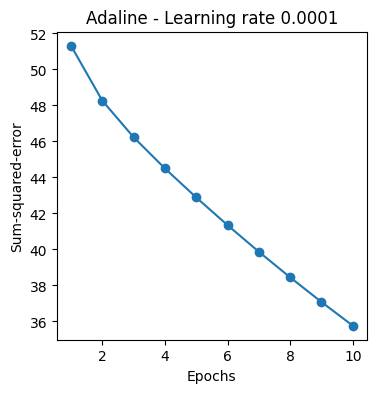

In [18]:
# 랜덤한 초기 가중치 생성
random_state=1
rgen = np.random.RandomState(random_state)
weight = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
weight=tuple(weight)
print(weight)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ada2 = ADAfit(X, y,weight, 0.0001, 10)[1]

ax.plot(range(1, len(ada2) + 1), ada2, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

# 문제 3. 
아달린은 특성 스케일을 조정했을 때 더 나은 결과를 얻을 수 있다고 알려져있다.
표준화를 사용하여 표준화된 특성 X_std를 구해보자.

- 표준화 공식 : $x'_j=\frac{x_j-\mu_j}{\sigma_j}$
- (힌트 : X[  ].mean(), X[  ].std())

In [19]:
# 특성을 표준화합니다.
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()

모든 문제를 해결한 당신 아래의 코드를 실행하여 학습결과를 살펴보자.

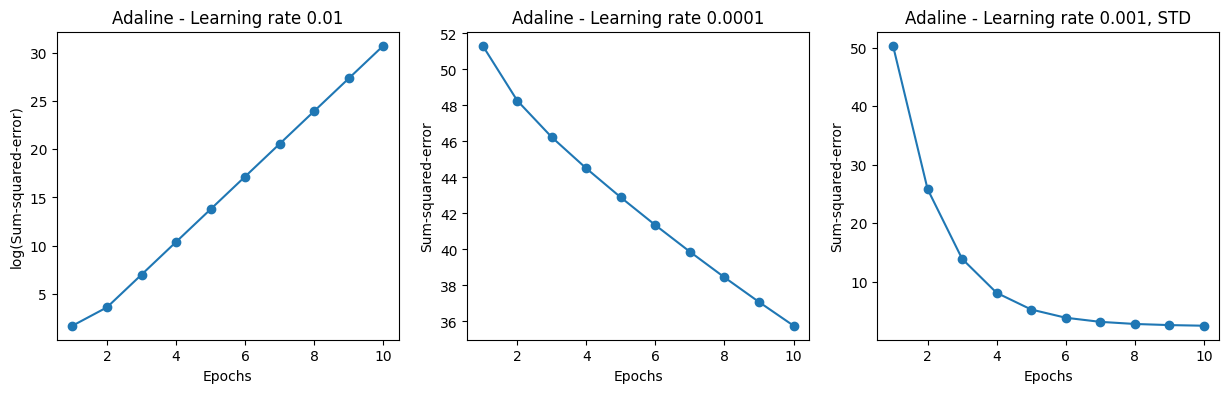

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ada1 = ADAfit(X, y, weight, 0.01, 10)[1]
ax[0].plot(range(1, len(ada1) + 1), np.log10(ada1), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')


ada2 = ADAfit(X, y,weight, 0.0001, 10)[1]
ax[1].plot(range(1, len(ada2) + 1), ada2, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

ada3 = ADAfit(X_std, y,weight, 0.001, 10)[1]
ax[2].plot(range(1, len(ada3) + 1), ada3, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.001, STD')


plt.show()